In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train=pd.read_csv('train_data.csv')

In [25]:
test=pd.read_csv('test_data.csv')

In [26]:
print(train.shape,train.columns)

(169307, 43) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')


In [27]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

def free():
    return gc.collect()

def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()
    
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')    

In [28]:
#print(train.isnull().sum())

In [29]:
from sklearn.decomposition import PCA

In [30]:
# pca=PCA(n_components=28,svd_solver='full',random_state=1996)
# pca.fit(train)

In [31]:
# print(pca.explained_variance_ratio_.sum())

In [32]:
# train=pca.transform(train)
# test=pca.transform(test)

In [33]:
for i in train.columns:
    if (len(train[train[i]==0])==len(train)):
        print(i,' - ',len(train)-len(train[i][train[i]==0]))

cat_17  -  0


In [34]:
for i in test.columns:
    if (len(test[test[i]==0])==len(test)):
        print(i)

cat_6
cat_17
cat_18


In [35]:
for i in train.columns:
    if i!='target': 
        print(i,' - ',len(train)-len(train[i][train[i]==0]),' - ',len(test)-len(test[i][test[i]==0]))
        #print((len(test)-len(test[i][test[i]==0]))/(len(train)-len(train[i][train[i]==0])))

connection_id  -  169307  -  91166
cont_1  -  4338  -  2324
cont_2  -  129759  -  69882
cont_3  -  29564  -  15812
cont_4  -  29690  -  15844
cont_5  -  29405  -  15680
cont_6  -  10756  -  5960
cont_7  -  10850  -  5982
cont_8  -  167951  -  90428
cont_9  -  38372  -  20603
cont_10  -  11697  -  6244
cont_11  -  165296  -  89025
cont_12  -  50687  -  27219
cont_13  -  120053  -  64645
cont_14  -  17738  -  9480
cont_15  -  31122  -  16620
cont_16  -  30813  -  16535
cont_17  -  12430  -  6854
cont_18  -  12003  -  6636
cat_1  -  169307  -  91166
cat_2  -  169307  -  91166
cat_3  -  169307  -  91166
cat_4  -  2  -  1
cat_5  -  42  -  25
cat_6  -  1  -  0
cat_7  -  335  -  199
cat_8  -  18  -  28
cat_9  -  24612  -  13185
cat_10  -  131  -  81
cat_11  -  17  -  5
cat_12  -  4  -  3
cat_13  -  173  -  99
cat_14  -  83  -  35
cat_15  -  12  -  8
cat_16  -  164  -  85
cat_17  -  0  -  0
cat_18  -  1  -  0
cat_19  -  147  -  96
cat_20  -  169305  -  91166
cat_21  -  169305  -  91166
cat_22 

In [36]:
# Drop cat_17,cat_18,cat_12,cat_6,cat_4

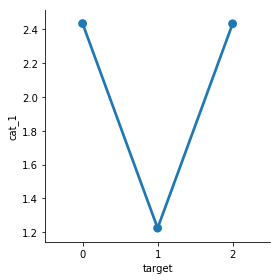

KeyboardInterrupt: 

In [37]:
for i in train.columns:
    if i!='target' and 'cat' in i:
        sns.factorplot(y=i,x='target',data=train)
        plt.show()

In [241]:
# for i in train.columns:
#     if i!='target':
#         sns.countplot(x=i,data=train)
#         plt.show()
sns.countplot(x='target',data=train)

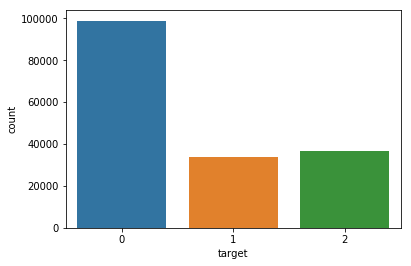

In [242]:
plt.show()

In [266]:
for i in ['cat_17','cat_18','cat_12','cat_6','cat_4']:
    print(i,'  -  ',train[train[i]!=0]['target'])

cat_17   -   Series([], Name: target, dtype: int64)
cat_18   -   166444    2
Name: target, dtype: int64
cat_12   -   19209     1
95920     1
133670    1
168265    1
Name: target, dtype: int64
cat_6   -   26002    1
Name: target, dtype: int64
cat_4   -   106273    2
136130    0
Name: target, dtype: int64


In [299]:
for i in train.columns:
    print(i,'  ',train[train['cat_12']!=0][i].values,' ',test[test['cat_12']!=0][i].values)

connection_id    ['cxcon_57628' 'cxcon_118453' 'cxcon_62395' 'cxcon_166180']   ['cxcon_19718' 'cxcon_74636' 'cxcon_34877']
cont_1    [11861     1 12882 15382]   [    0 15509 14697]
cont_2    [ 673  899  709 1011]   [ 142  512 1419]
cont_3    [ 88306    337 110716 221754]   [ 26316  70827 320547]
cont_4    [ 0.  0.  0.  0.]   [ 1.  0.  0.]
cont_5    [ 0.  0.  0.  0.]   [ 1.  0.  0.]
cont_6    [ 0.  0.  0.  0.]   [ 0.  0.  0.]
cont_7    [ 0.  0.  0.  0.]   [ 0.  0.  0.]
cont_8    [ 1.  1.  1.  1.]   [ 1.  1.  1.]
cont_9    [ 0.  0.  0.  0.]   [ 0.  0.  0.]
cont_10    [ 0.  1.  0.  0.]   [ 0.  0.  0.]
cont_11    [ 0.12  0.73  0.27  0.48]   [ 0.22  0.23  0.26]
cont_12    [ 0.05  0.18  0.15  0.08]   [ 0.04  0.04  0.1 ]
cont_13    [ 0.01  0.09  0.04  0.04]   [ 0.01  0.01  0.02]
cont_14    [ 0.    0.02  0.    0.  ]   [ 0.09  0.    0.  ]
cont_15    [ 0.    0.    0.04  0.  ]   [ 0.19  0.    0.02]
cont_16    [ 0.    0.    0.14  0.  ]   [ 0.82  0.    0.09]
cont_17    [ 0.02  0.    0.    0.  ]   [

KeyError: 'target'

cat_1     3 1 169307 91166


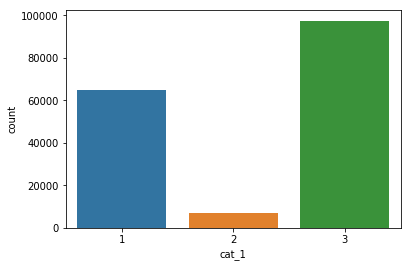

cat_2     69 1 169307 91166


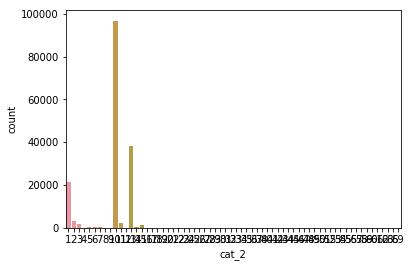

cat_3     11 1 169307 91166


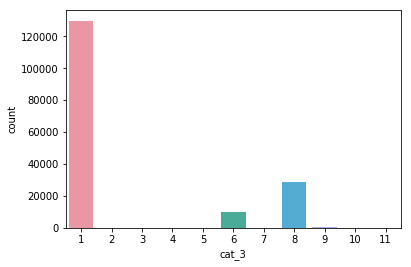

cat_4     1 0 2 1


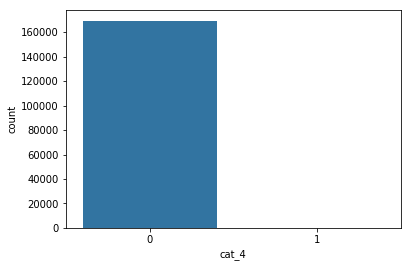

cat_5     3 0 42 25


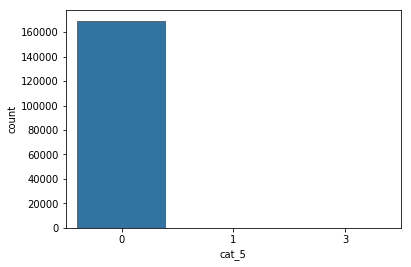

cat_6     2 0 1 0


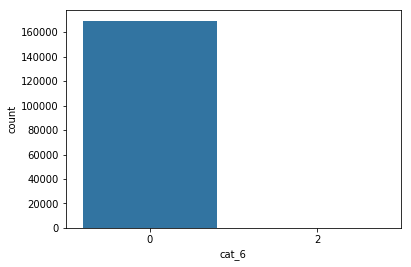

cat_7     30 0 335 199


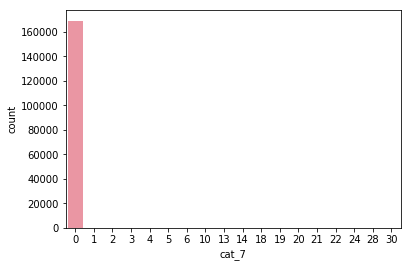

cat_8     1 0 18 28


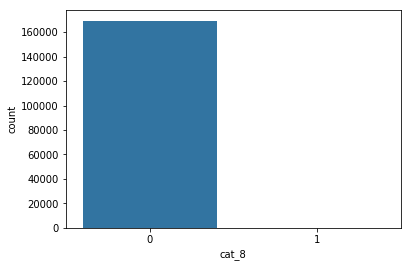

cat_9     1 0 24612 13185


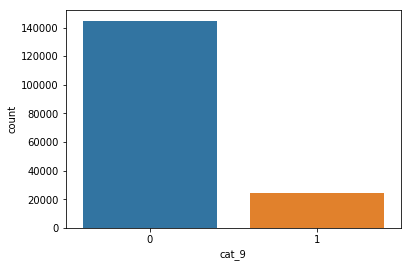

cat_10     435 0 131 81


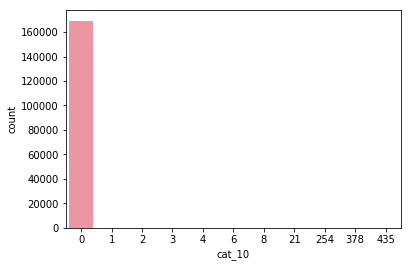

cat_11     1 0 17 5


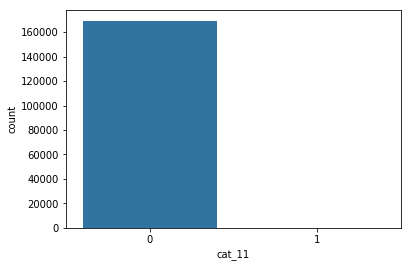

cat_12     2 0 4 3


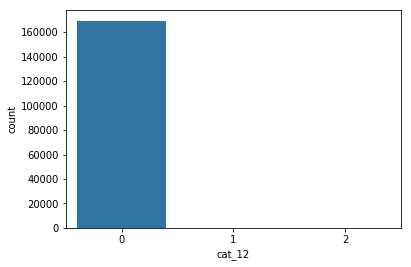

cat_13     480 0 173 99


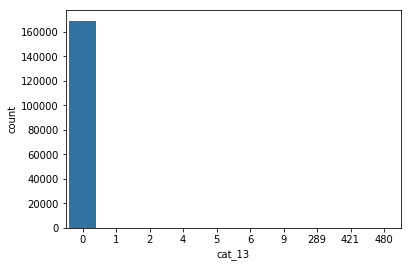

cat_14     25 0 83 35


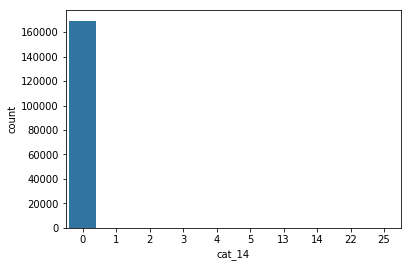

cat_15     2 0 12 8


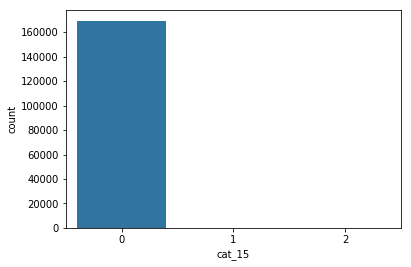

cat_16     5 0 164 85


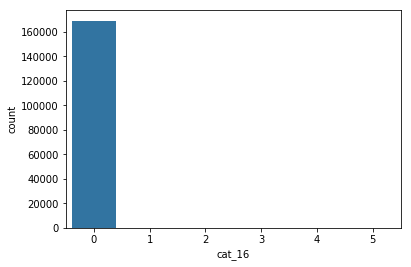

cat_17     0 0 0 0


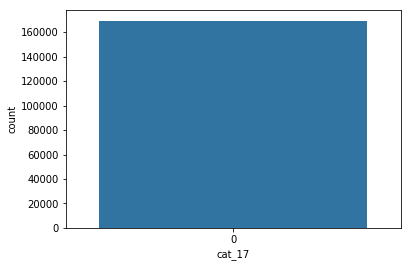

cat_18     1 0 1 0


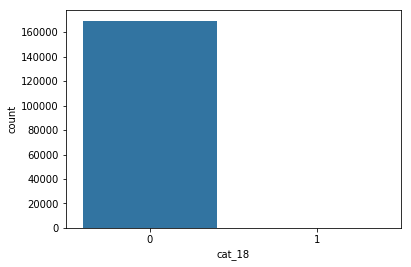

cat_19     1 0 147 96


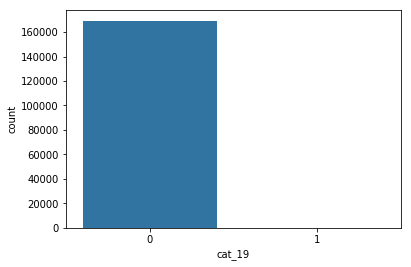

cat_20     511 0 169305 91166


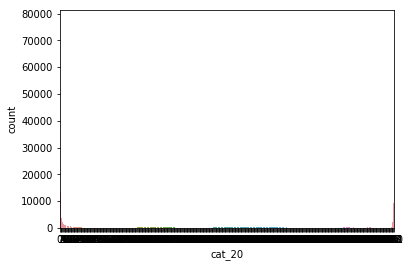

cat_21     511 0 169305 91166


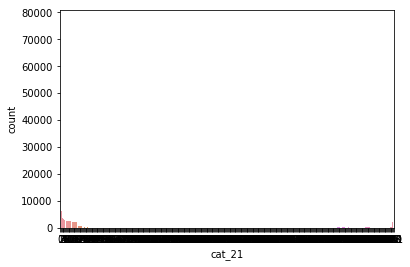

cat_22     255 0 169306 91164


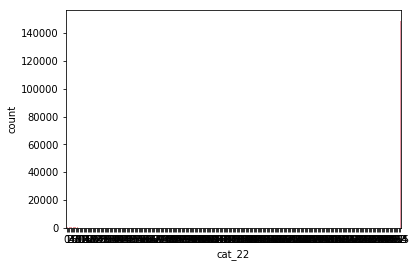

cat_23     255 0 169306 91164


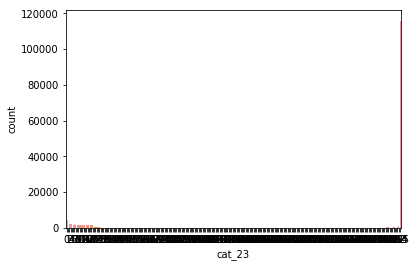

In [302]:
for i in train.columns:
    if 'cat' in i:
        print(i,'   ',max(train[i]),min(train[i]),len(train[train[i]!=0]),len(test[test[i]!=0]))
        sns.countplot(x=i,data=train)
        plt.show()
#cat_4,cat_5,cat_6,cat_7,cat_8,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19        

cat_4   2


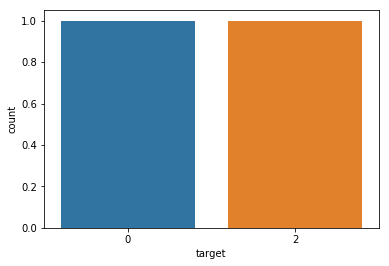

cat_5   42


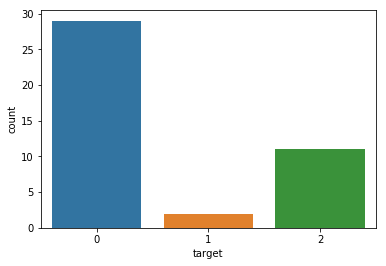

cat_6   1


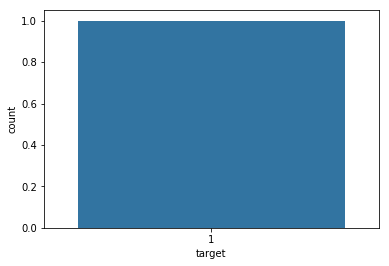

cat_7   335


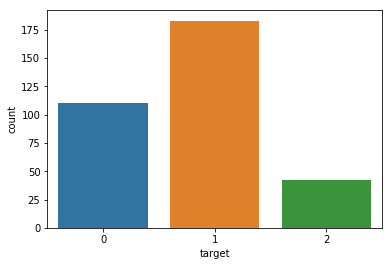

cat_8   18


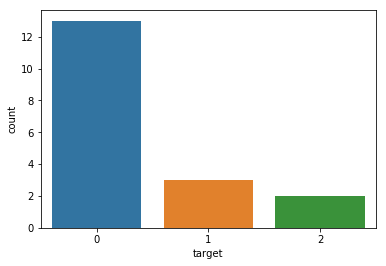

cat_10   131


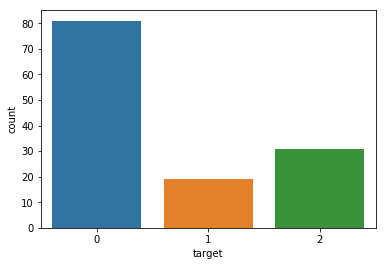

cat_11   17


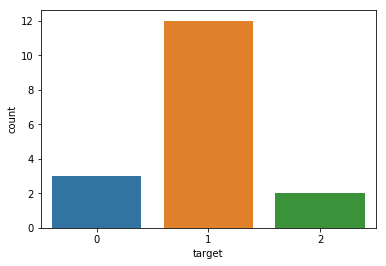

cat_12   4


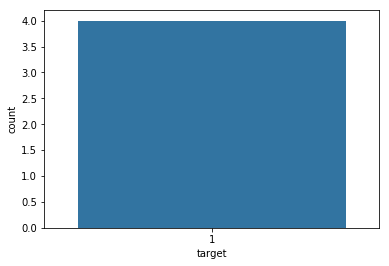

cat_13   173


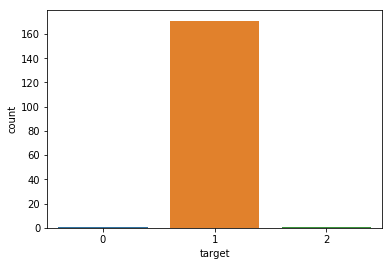

cat_14   83


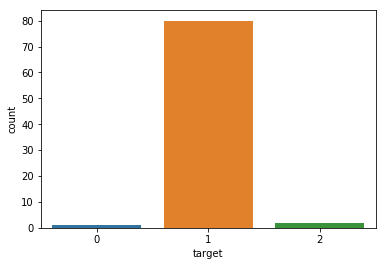

cat_15   12


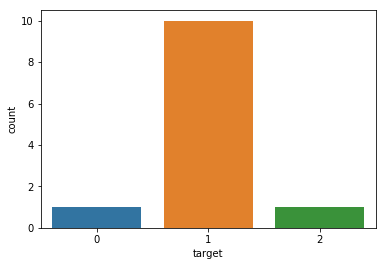

cat_16   164


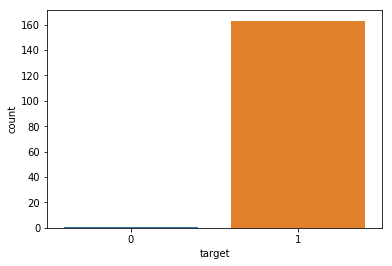

cat_17   0
cat_18   1


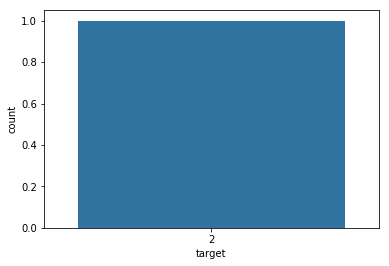

cat_19   147


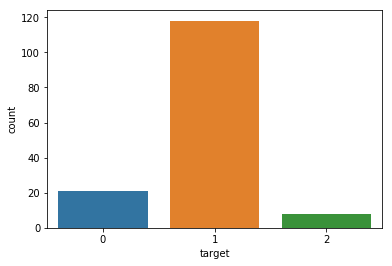

In [312]:
for i in ['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19']:
    print(i,' ',len(train[train[i]!=0]))
    if len(train[train[i]!=0])!=0:
        sns.countplot(x='target',data=(train[train[i]!=0]))
        plt.show()
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns       

In [38]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [335]:
scale=MinMaxScaler()
li=[]
for i in train.columns:
    if 'cat' not in i and i!='connection_id':
        li.append(i)
scaled_train_data=scale.fit_transform(train[li])

In [343]:
scaled_train_data=pd.DataFrame(scaled_train_data,columns=li)
print(scaled_train_data.shape)

(169307, 19)


In [344]:
for i in li:
    train[i]=scaled_train_data[i].values

In [342]:
for i in li:
    print(max(scaled_train_data[i]),'  ',max(train[i]))
    print(min(scaled_train_data[i]),'  ',min(train[i]))

1.0    42596
0.0    0
1.0    11396904
0.0    0
1.0    11730594
0.0    0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    1.0
0.0    0.0
1.0    2
0.0    0


cont_1


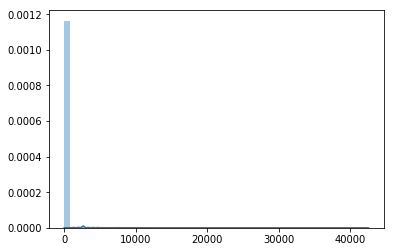

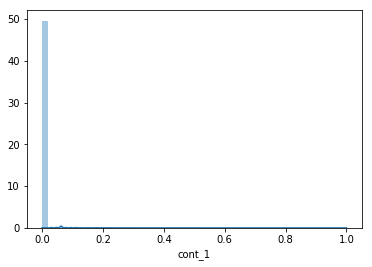

cont_2


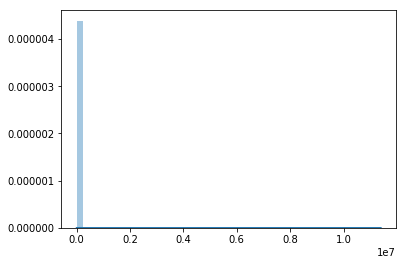

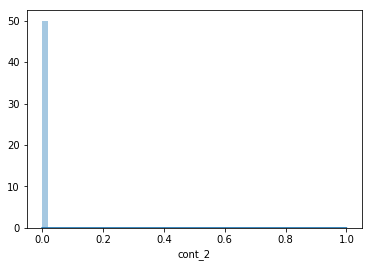

cont_3


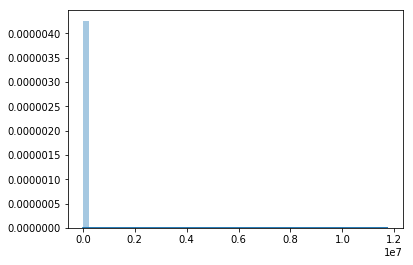

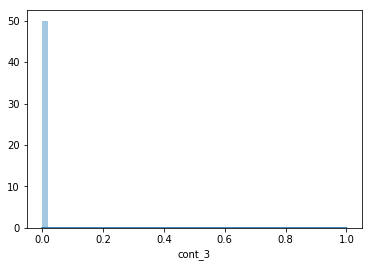

cont_4


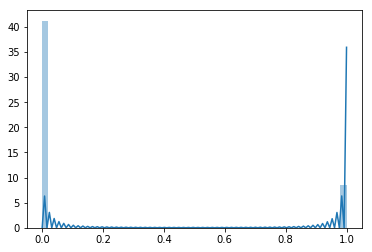

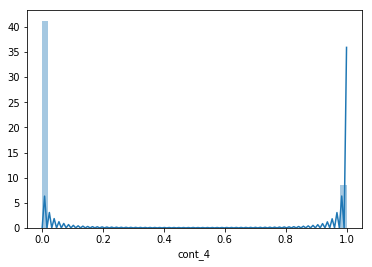

cont_5


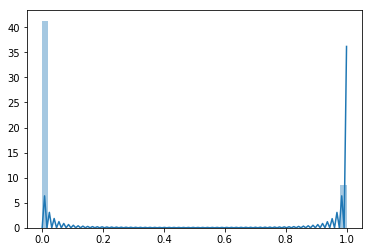

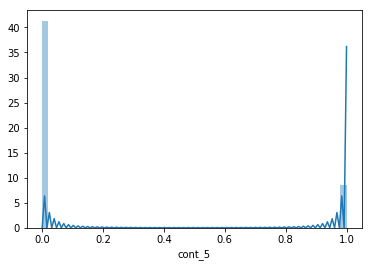

cont_6


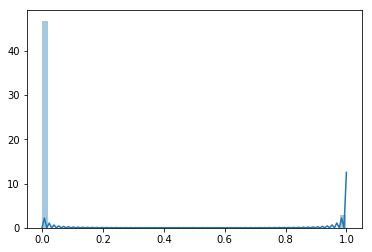

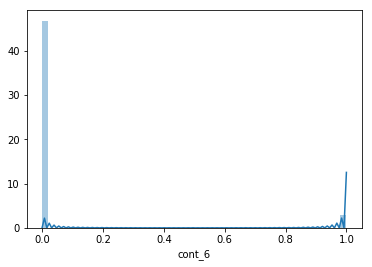

cont_7


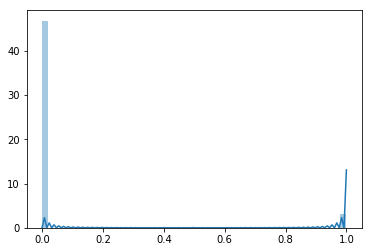

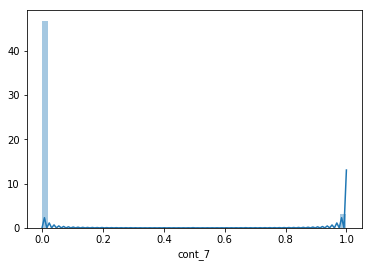

cont_8


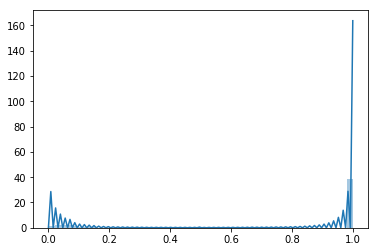

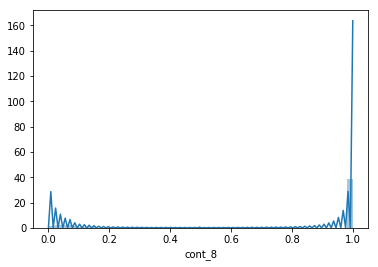

cont_9


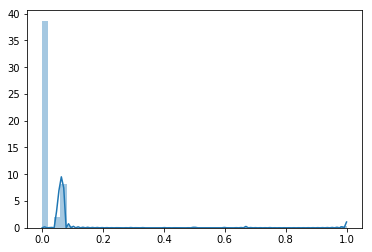

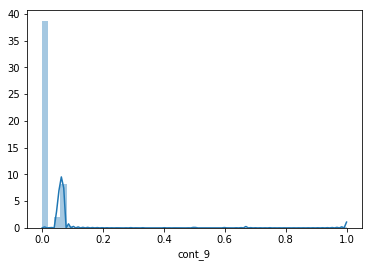

cont_10


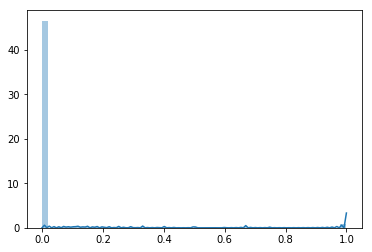

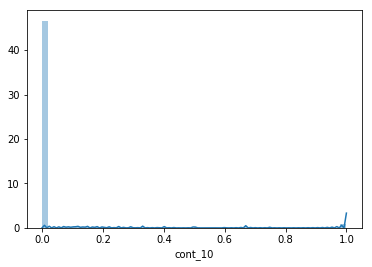

cont_11


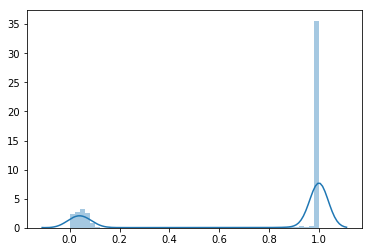

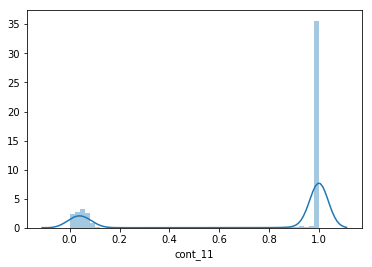

cont_12


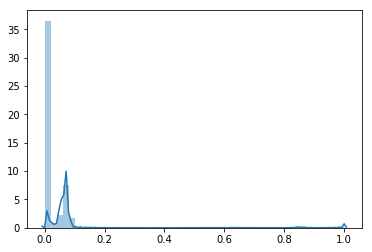

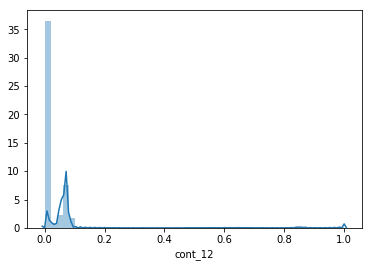

cont_13


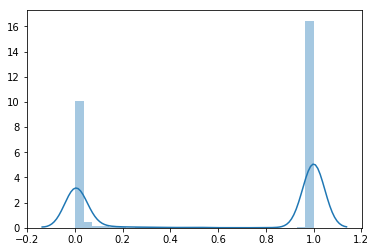

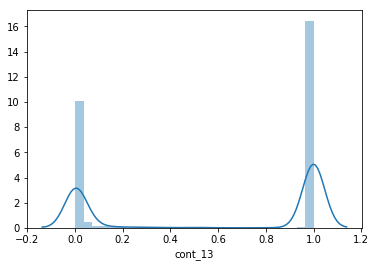

cont_14


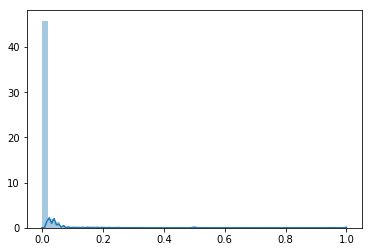

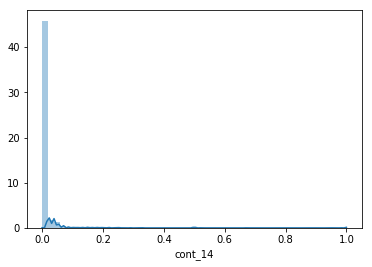

cont_15


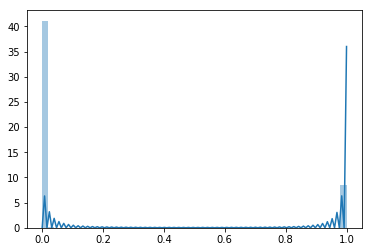

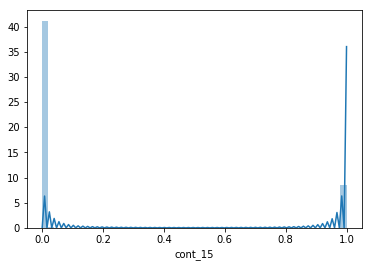

cont_16


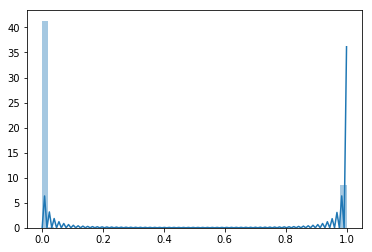

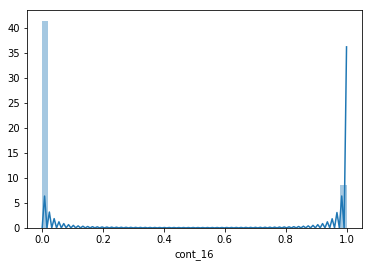

cont_17


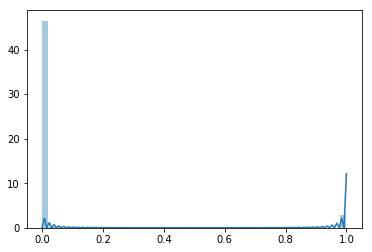

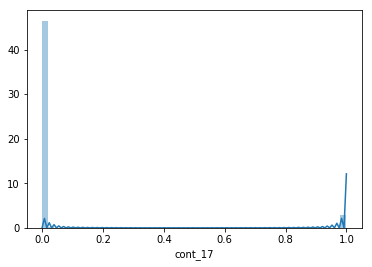

cont_18


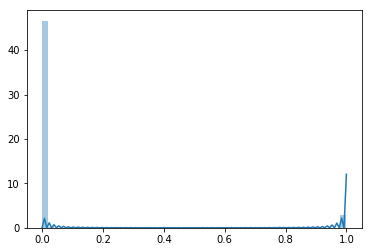

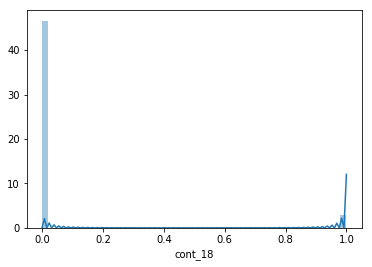

target


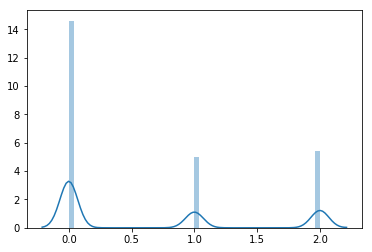

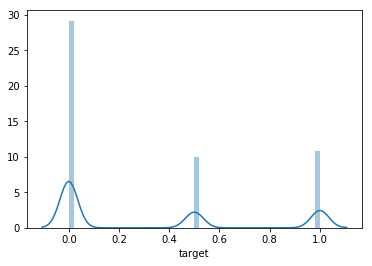

In [340]:
for i in li:
    print(i)
    sns.distplot(train[i].values)
    plt.show()
    sns.distplot(scaled_train_data[i])
    plt.show()

In [354]:
print(train[['cont_4','cont_5']].corr()['cont_4'])

cont_4    1.000000
cont_5    0.998541
Name: cont_4, dtype: float64


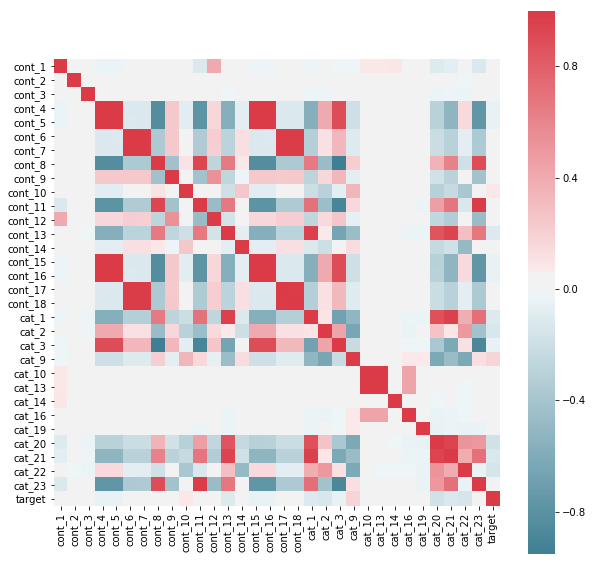

In [351]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr=train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax)
plt.show()

# Some more visualization

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder()
tmp=ohe.fit(np.array(pd.concat([train['cat_1'],test['cat_1']],0)).reshape(-1,1))
tmp=ohe.transform(np.array(train['cat_1']).reshape(-1,1)).toarray().reshape(-1,3)

In [40]:
for i in get_features(train):
    if 'cat' in i:
        print(i,max(train[i]),max(test[i]),' -  ',min(train[i]),min(test[i]))

cat_1 3 3  -   1 1
cat_2 69 67  -   1 1
cat_3 11 11  -   1 1
cat_9 1 1  -   0 0
cat_20 511 511  -   0 1
cat_21 511 511  -   0 1
cat_22 255 255  -   0 0
cat_23 255 255  -   0 0


# cat_9

In [41]:
pd.crosstab(train['cat_9'],train['target'],margins=True)

target,0,1,2,All
cat_9,,,,
0,98503,9472,36720,144695
1,365,24113,134,24612
All,98868,33585,36854,169307


# cat_1

In [42]:
pd.crosstab(train['cat_1'],train['target'],margins=True)

target,0,1,2,All
cat_1,,,,
1,27879,26446,10412,64737
2,315,6738,123,7176
3,70674,401,26319,97394
All,98868,33585,36854,169307


# cat_3 

In [43]:
pd.crosstab(train['cat_3'],train['target'],margins=True)

target,0,1,2,All
cat_3,,,,
1,71387,31759,26588,129734
2,1,4,1,6
3,1,10,0,11
4,5,1,3,9
5,1,0,0,1
6,6004,1767,2288,10059
7,136,17,56,209
8,21103,14,7838,28955
9,202,13,68,283


Binning

In [44]:
train['cat_3']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in train['cat_3'].values]
test['cat_3']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in test['cat_3'].values]

In [45]:
pd.crosstab(train['cat_3'],train['target'],margins=True)

target,0,1,2,All
cat_3,,,,
cat1,71387,31759,26588,129734
cat2,6148,1799,2348,10295
cat3,21333,27,7918,29278
All,98868,33585,36854,169307


# cat_2

In [46]:
# print_full(pd.crosstab(train['cat_2'],train['target'],margins=True))

After seing above data and their distributions, concluding that attack1 and attack0 are major for some specific category

Extracting some features for attack1 and attack0

In [47]:
len(train[train['cat_2']>15])

1643

In [48]:
# print_full(train['cat_2'].value_counts())

In [49]:
# print_full(test['cat_2'].value_counts())

In [50]:
attack_1=[1,2,3,11,15,40]
attack_0=[10,13]
not_attack_1=[]

In [51]:
major_attack_1,major_attack_0=[],[]
for i in train['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
train['is_attack_1']=major_attack_1
train['is_attack_0']=major_attack_0

major_attack_1,major_attack_0=[],[]
for i in test['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
test['is_attack_1']=major_attack_1
test['is_attack_0']=major_attack_0

In [52]:
len(train[train['is_attack_1']!=0])

30820

binning

In [85]:
train['cat_2']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in train['cat_2'].values]
test['cat_2']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in test['cat_2'].values]

In [86]:
print_full(pd.crosstab(train['cat_2'],train['target'],margins=True))

target      0      1      2     All
cat_2                              
cat1      845  27246    305   28396
cat2    70355    114  26211   96680
cat3    27668   6225  10338   44231
All     98868  33585  36854  169307


# cat_20

In [87]:
print_full(pd.crosstab(train['cat_20'],train['target'],margins=True))
#<=50 and <=500 and else

target      0      1      2     All
cat_20                             
0           0      2      0       2
1         829  12363    314   13506
2         277   3420     97    3794
3         120   1885     42    2047
4          85   1623     22    1730
5          29   1390     14    1433
6          24   1225      6    1255
7          13   1123     11    1147
8          17    920      6     943
9          10    856      7     873
10          7    855      4     866
11         14    765      8     787
12         18    699      3     720
13         12    629      3     644
14          9    546      1     556
15          7    484      1     492
16         22    443      4     469
17          8    410      5     423
18          9    347      2     358
19         14    300      2     316
20         11    276      4     291
21         10    241      3     254
22          8    226      3     237
23         11    199      6     216
24         11    186      3     200
25          9    193      4 

In [88]:
print_full(pd.value_counts(train['cat_20']))

511    77311
1      13506
510     9252
2       3794
509     2094
3       2047
4       1730
5       1433
6       1255
7       1147
8        943
9        873
10       866
11       787
12       720
13       644
14       556
508      516
15       492
16       469
17       423
130      384
18       358
139      345
120      342
117      339
110      339
140      337
116      336
133      332
118      329
126      328
112      327
142      327
449      327
109      327
129      327
135      326
125      323
128      323
108      323
119      320
127      320
113      320
105      318
111      317
19       316
141      315
138      315
123      314
131      314
132      313
134      311
107      311
101      311
114      310
115      304
121      303
103      303
102      303
104      297
143      297
122      296
124      296
451      291
20       291
106      290
136      286
137      284
478      275
145      273
144      270
149      269
146      265
147      263
148      256
21       254

In [89]:
print_full(pd.value_counts(test['cat_20']))

511    41687
1       7343
510     5030
2       2015
509     1153
3       1120
4        922
5        780
6        620
7        592
8        513
9        498
10       423
11       412
12       386
14       332
13       303
15       285
508      282
16       244
17       240
128      207
18       205
123      196
111      194
19       191
104      189
112      187
102      186
137      186
124      183
120      183
113      183
116      180
140      180
110      177
129      175
115      175
131      174
117      174
122      172
132      172
130      171
133      171
121      169
142      169
108      168
118      168
127      166
101      166
103      166
105      164
145      164
143      161
480      161
109      160
136      160
125      160
138      159
114      159
148      158
107      158
126      158
141      157
106      156
144      155
135      155
119      152
139      151
149      147
147      146
21       146
20       142
134      142
451      140
449      139
150      135

In [90]:
train['cat_20']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in train['cat_20'].values]
test['cat_20']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in test['cat_20'].values]

In [93]:
(pd.crosstab(train['cat_20'],train['target'],margins=True))

target,0,1,2,All
cat_20,,,,
cat1,1829,33089,659,35577
cat2,31842,475,11848,44165
cat3,65197,21,24347,89565
All,98868,33585,36854,169307


# cat_21

In [94]:
print_full(pd.crosstab(train['cat_21'],train['target'],margins=True))
#<=20 and <=500 and else

target      0      1      2     All
cat_21                             
0           0      2      0       2
1        2365   9734    920   13019
2        1535   4123    553    6211
3        1414   1909    529    3852
4        1405   1464    480    3349
5        1300   1289    446    3035
6        1319   1110    482    2911
7        1289   1067    481    2837
8        1241    907    492    2640
9        1305    811    495    2611
10       1294    854    487    2635
11       1268    780    497    2545
12       1333    684    500    2517
13       1300    685    453    2438
14       1274    632    485    2391
15       1237    523    467    2227
16       1223    526    497    2246
17       1273    467    495    2235
18       1314    434    454    2202
19       1284    395    487    2166
20       1259    377    479    2115
21        240    323     84     647
22        225    304     91     620
23        247    279     83     609
24        212    297     75     584
25        222    253     86 

In [95]:
print_full(pd.value_counts(train['cat_21']))

511    76871
1      13019
510     9353
2       6211
3       3852
4       3349
5       3035
6       2911
7       2837
8       2640
10      2635
9       2611
11      2545
12      2517
13      2438
14      2391
16      2246
17      2235
15      2227
18      2202
19      2166
20      2115
509     2023
21       647
22       620
23       609
24       584
25       561
508      497
449      327
451      291
478      275
27       250
480      236
26       230
453      227
482      212
28       211
481      206
29       202
447      200
446      199
507      198
456      195
457      182
458      175
32       172
450      171
477      170
452      163
476      162
445      158
479      152
31       146
30       137
33       135
463      132
454      132
461      130
448      128
34       124
35       119
36       117
484      114
444       96
38        95
436       93
37        92
39        84
486       84
483       84
460       82
443       82
41        80
40        79
439       77
459       76

In [96]:
print_full(pd.value_counts(test['cat_21']))

511    41453
1       7013
510     5082
2       3385
3       2207
4       1717
5       1642
6       1509
7       1508
9       1446
8       1437
10      1397
11      1369
12      1308
15      1268
14      1262
13      1261
17      1250
16      1201
18      1161
19      1160
509     1115
20      1109
21       371
22       340
24       327
23       325
25       278
508      267
480      160
451      140
449      139
453      130
478      123
26       120
27       114
481      111
482      110
450      106
447      104
446      102
28       100
507       99
32        98
457       97
456       96
31        95
458       88
476       87
29        87
30        85
477       82
452       81
34        79
479       77
461       74
445       72
454       72
448       69
33        61
444       56
484       56
36        56
35        55
37        54
463       54
38        52
441       51
483       49
442       49
464       47
460       46
39        45
443       44
459       44
486       42
436       42

In [97]:
train['cat_21']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in train['cat_21'].values]
test['cat_21']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in test['cat_21'].values]

In [98]:
pd.crosstab(train['cat_21'],train['target'])

target,0,1,2
cat_21,,,
cat1,27232,28773,10179
cat2,6757,4792,2444
cat3,64879,20,24231


# cat_22

In [100]:
print_full(pd.crosstab(train['cat_22'],train['target'],margins=True))

target      0      1      2     All
cat_22                             
0           0      1      0       1
1         185    623     62     870
2         131    502     44     677
3          18    432      8     458
4          17    354      8     379
5          10    322      3     335
6           4    314      1     319
7           5    282      5     292
8           3    278      2     283
9           4    267      3     274
10          2    261      2     265
11          2    252      1     255
12          0    241      1     242
13          2    213      0     215
14          2    217      0     219
15          0    221      0     221
16          1    206      0     207
17          3    203      0     206
18          0    184      2     186
19          1    168      1     170
20          2    173      0     175
21          2    174      1     177
22          0    186      0     186
23          3    183      0     186
24          1    176      1     178
25          1    167      0 

In [103]:
train['cat_22']=['cat1' if i<=254 else 'cat2' for i in train['cat_22'].values]
test['cat_22']=['cat1' if i<=254 else 'cat2' for i in test['cat_22'].values]

In [104]:
pd.crosstab(train['cat_22'],train['target'],margins=True)

target,0,1,2,All
cat_22,,,,
cat1,566,19745,207,20518
cat2,98302,13840,36647,148789
All,98868,33585,36854,169307


# cat_23

In [105]:
print_full(pd.crosstab(train['cat_23'],train['target'],margins=True))
#<=25 and <=254 and else

target      0      1      2     All
cat_23                             
0           0      1      0       1
1        2028   1357    754    4139
2        1341    490    490    2321
3        1296    192    501    1989
4        1361    100    456    1917
5        1290     73    457    1820
6        1327     72    500    1899
7        1308     62    476    1846
8        1195     70    500    1765
9        1308     54    500    1862
10       1301     70    478    1849
11       1260     52    492    1804
12       1308     57    507    1872
13       1301     51    460    1812
14       1236     60    499    1795
15       1245     50    454    1749
16       1235     43    491    1769
17       1265     51    465    1781
18       1297     37    425    1759
19       1229     34    480    1743
20       1216     40    459    1715
21        235     46     83     364
22        224     26     95     345
23        251     37     84     372
24        206     40     71     317
25        222     44     87 

In [106]:
train['cat_23']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in train['cat_23'].values]
test['cat_23']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in test['cat_23'].values]

In [107]:
pd.crosstab(train['cat_23'],train['target'],margins=True)

target,0,1,2,All
cat_23,,,,
cat1,27485,3209,10264,40958
cat2,837,11329,320,12486
cat3,70546,19047,26270,115863
All,98868,33585,36854,169307


# Encoding Techniques 

In [26]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=[...])
# encoder = ce.OrdinalEncoder(cols=[...])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])

# encoder.fit(X, y)
# X_cleaned = encoder.transform(X_dirty)

In [114]:
#cat_20 qcut_bins=5,cat_21 bins=7,cat_22 bins=8,cat_23 bins=3,cat_2 bins=6,cat_3 bins=5
for i in ['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23']:
    encoder=ce.PolynomialEncoder()
    encoder.fit(train[i].values)
    ter,tes=pd.DataFrame(),pd.DataFrame()
    ter=encoder.transform(train[i].values)
    tes=encoder.transform(test[i].values)
    print(ter.head(20),'\n\n',tes.head(),'\n\n------------------------------------------------\n\n')
#     print(max(ter[0]),min(ter[0]),max(tes[0]),min(tes[0]))

    col_0_0       col_0_1   col_0_2
0       1.0 -7.071068e-01  0.408248
1       1.0 -7.071068e-01  0.408248
2       1.0 -7.071068e-01  0.408248
3       1.0 -7.071068e-01  0.408248
4       1.0 -7.071068e-01  0.408248
5       1.0 -7.071068e-01  0.408248
6       1.0 -5.551115e-17 -0.816497
7       1.0 -7.071068e-01  0.408248
8       1.0  7.071068e-01  0.408248
9       1.0  7.071068e-01  0.408248
10      1.0 -7.071068e-01  0.408248
11      1.0 -5.551115e-17 -0.816497
12      1.0  7.071068e-01  0.408248
13      1.0 -5.551115e-17 -0.816497
14      1.0 -7.071068e-01  0.408248
15      1.0 -7.071068e-01  0.408248
16      1.0 -5.551115e-17 -0.816497
17      1.0 -5.551115e-17 -0.816497
18      1.0 -7.071068e-01  0.408248
19      1.0  7.071068e-01  0.408248 

    col_0_0       col_0_1   col_0_2
0      1.0 -5.551115e-17 -0.816497
1      1.0 -7.071068e-01  0.408248
2      1.0 -7.071068e-01  0.408248
3      1.0 -7.071068e-01  0.408248
4      1.0 -7.071068e-01  0.408248 

-----------------------------